In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [29]:
# Load the cleaned DataFrame
cleaned_df = pd.read_csv("/Users/sa18/Desktop/Unsupervised_DJ/Data/cleaned_data.csv")

In [30]:
cleaned_df.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


In [31]:
# print out the shape of this dataframe to note the number of samples

cleaned_df.shape

(28362, 17)

# K Means Clustering Without Scaling

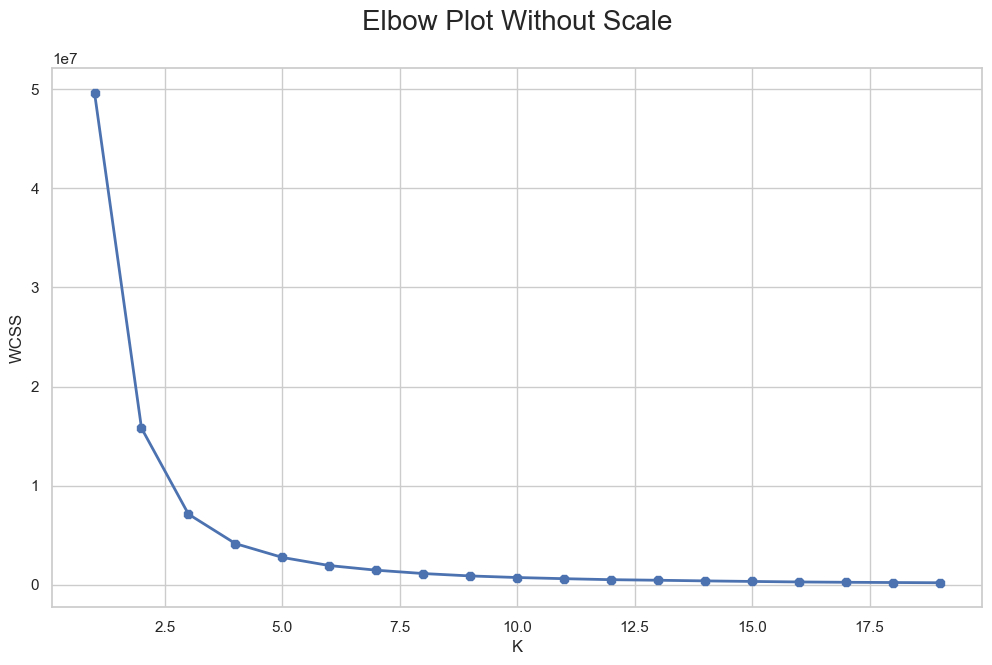

In [32]:
# create an Elbow Plot of WCSS

X1 = cleaned_df.loc[:, ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
                'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age' ]].values

wcss= []
for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

sns.set(style='whitegrid') # to show gridlines
plt.plot(range(1, 20), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot Without Scale\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

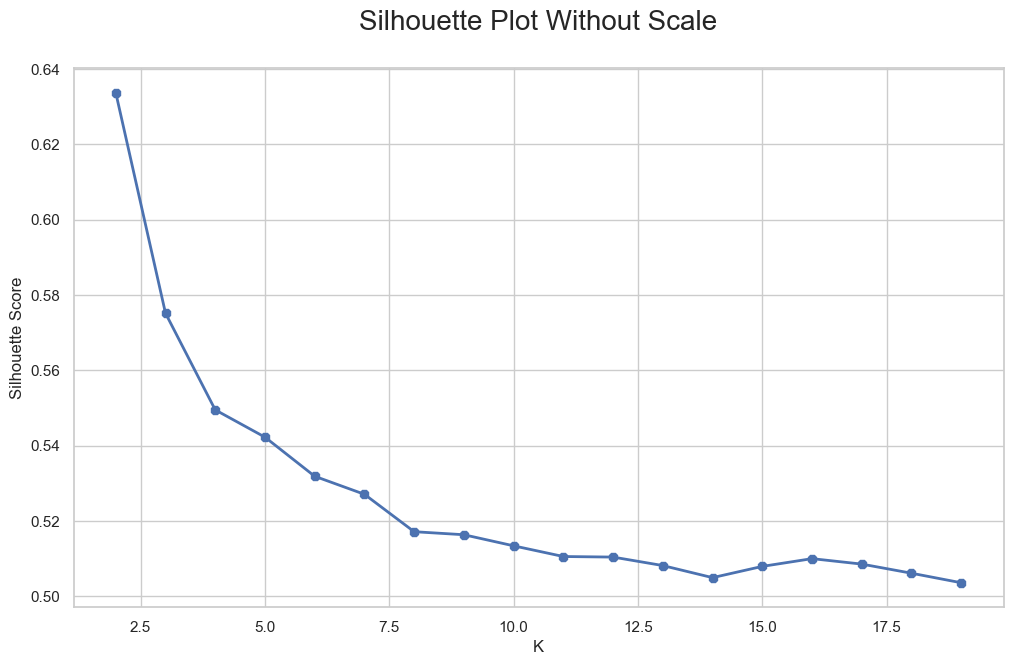

In [33]:
# create a plot of Silhoutte Score

silhouette = []
for k in range(2, 20):
    # create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhouette Plot Without Scale\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

The Elbow Plot shows the Within-Cluster Sum of Squares (WCSS) as a function of k (the number of clusters). As the WCSS decreases, k increases (i.e. the number of clusters increases). Silhouette Plots show a range of scores from 1 to -1, where the point closest to 1 is the best k value.  

The Elbow and Silhouette Plots show a k value of apporoximately 2. 

In [54]:
# create a KMeans object with this optimal number of clusters. Name this object `kmeans`

kmeans = KMeans(n_clusters = 2)

# fit this KMeans object using your `X1` data

kmeans.fit(X1)

KMeans(n_clusters=2)

In [58]:
# Generate labels for the  dataset

labels = kmeans.fit_predict(X1)
labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [59]:
# output the centroids of your clusters

kmeans.cluster_centers_

array([[5.33048398e+01, 2.17235562e-02, 1.13684578e-01, 1.30860407e-01,
        6.05778398e-02, 1.55403652e-02, 1.71149082e-02, 5.63898705e-02,
        7.94630507e-02, 6.02114814e-02, 6.51910069e-02, 4.21535954e-02,
        5.14958835e-02, 2.40541303e-02, 1.46501246e-01, 3.18133477e-02,
        4.58547046e-01],
       [1.33491185e+02, 1.92282656e-02, 1.32736019e-01, 9.07117330e-02,
        4.74802181e-02, 2.31747413e-02, 1.68310124e-02, 2.50315246e-02,
        6.80300967e-02, 2.10513434e-01, 4.43603824e-02, 6.35489124e-02,
        4.13822738e-02, 2.44634907e-02, 7.69898834e-02, 2.84874210e-02,
        3.22776879e-01]])

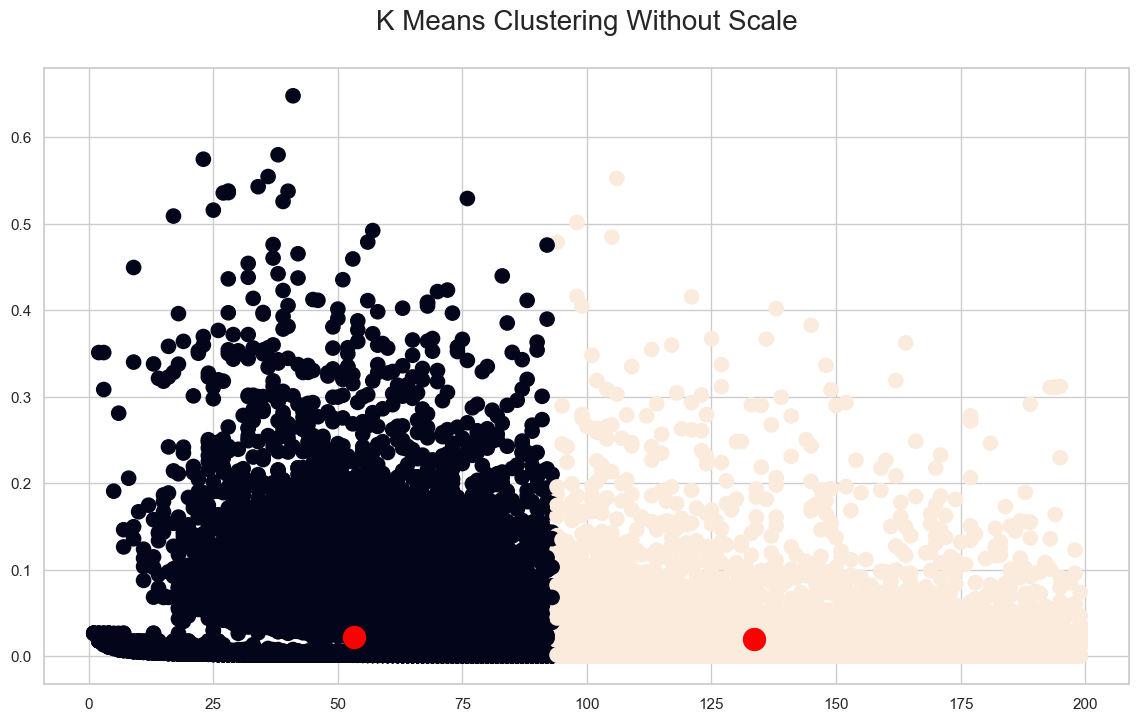

In [60]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Clustering Without Scale\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

# K Means Clustering with Scaling

In [38]:
# create an Elbow Plot of WCSS on scaled values

# create and use the standard scaler object to ensure all variables have equal range

scaler = StandardScaler()

# fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.fit_transform(X1)

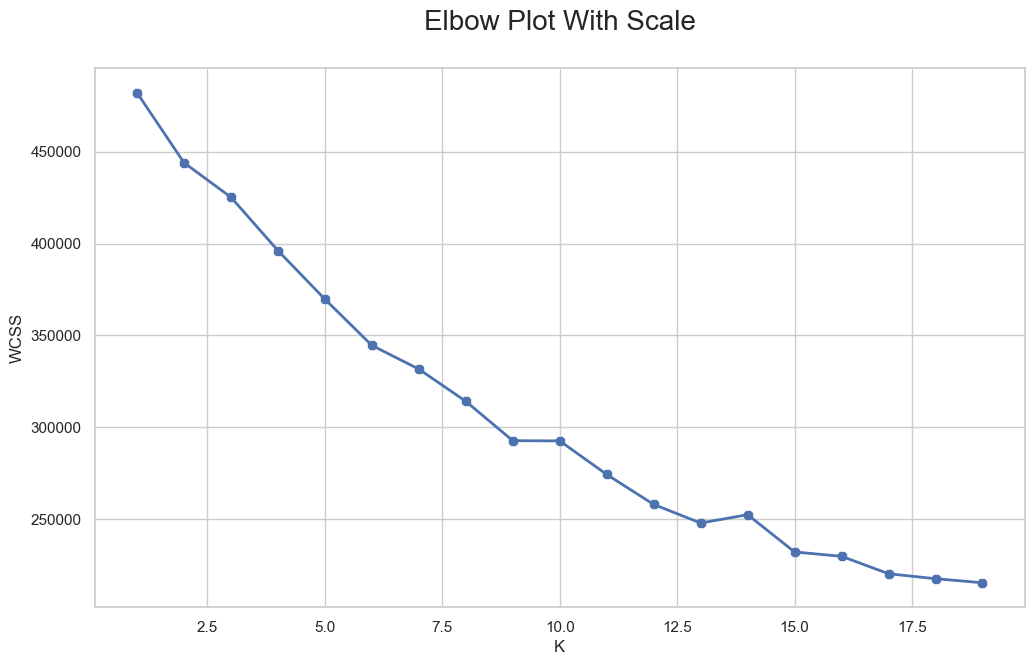

In [39]:
wcss_scaled = []
for k in range(1, 20):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')

    # fit your kmeans algorithm on your scaled dataset
    kmeans.fit(X1_scaled)

    # append the WCSS aka inertia to your wcss_scaled list
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 20), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot With Scale\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

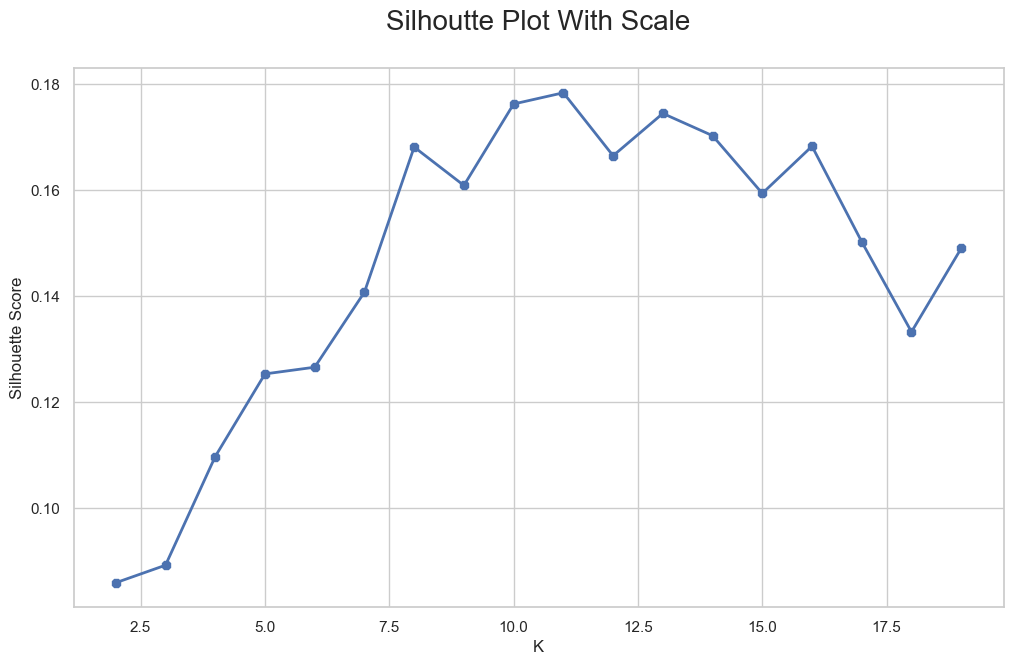

In [40]:
# create a plot of silhoutte score

silhouette_scaled = []
for k in range(2, 20):
    # create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot With Scale\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [61]:
# create a new KMeans object with this optimal number of clusters. Name this object `kmeans_scaled`

kmeans_scaled = KMeans(n_clusters =11, init='k-means++', n_init=20, random_state=42)

# fit this KMeans object on your data

kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=11, n_init=20, random_state=42)

In [62]:
#nGenerate labels for the  dataset

labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([10,  5,  1, ...,  3,  3,  3], dtype=int32)

In [63]:
# output the centroids of your clusters

kmeans_scaled.cluster_centers_

array([[ 1.32946011e-01, -2.36190684e-01,  8.68747183e-02,
        -1.20824511e-01, -2.00872899e-01, -1.76257069e-01,
        -8.92371311e-02, -2.70511869e-01, -4.16347633e-01,
        -6.01395761e-03, -1.50964452e-01,  2.86268901e+00,
        -2.12868462e-01, -1.00420849e-01, -2.63980647e-01,
        -2.50028743e-01,  3.41264539e-02],
       [-2.41527653e-01, -1.35861045e-01, -4.56460673e-01,
        -4.18913277e-01, -2.24455881e-01, -6.95019835e-02,
        -6.09053799e-02, -2.02942165e-01, -9.14823731e-02,
        -3.87694362e-01,  2.89282493e+00, -7.75459995e-02,
         2.06001254e-01,  1.11957935e-01, -3.79929670e-01,
        -1.42010166e-01,  4.02627628e-01],
       [-2.16588246e-01,  4.18589768e+00, -3.22075482e-01,
        -1.69012077e-01,  2.22161507e-02,  8.59383693e-02,
        -3.24166693e-02,  4.85942186e-02, -2.79474170e-01,
        -1.54019629e-01, -3.35240064e-02, -3.12975938e-01,
        -2.94053836e-01, -2.04260061e-01, -1.72914515e-02,
        -5.49471330e-02,  2.9

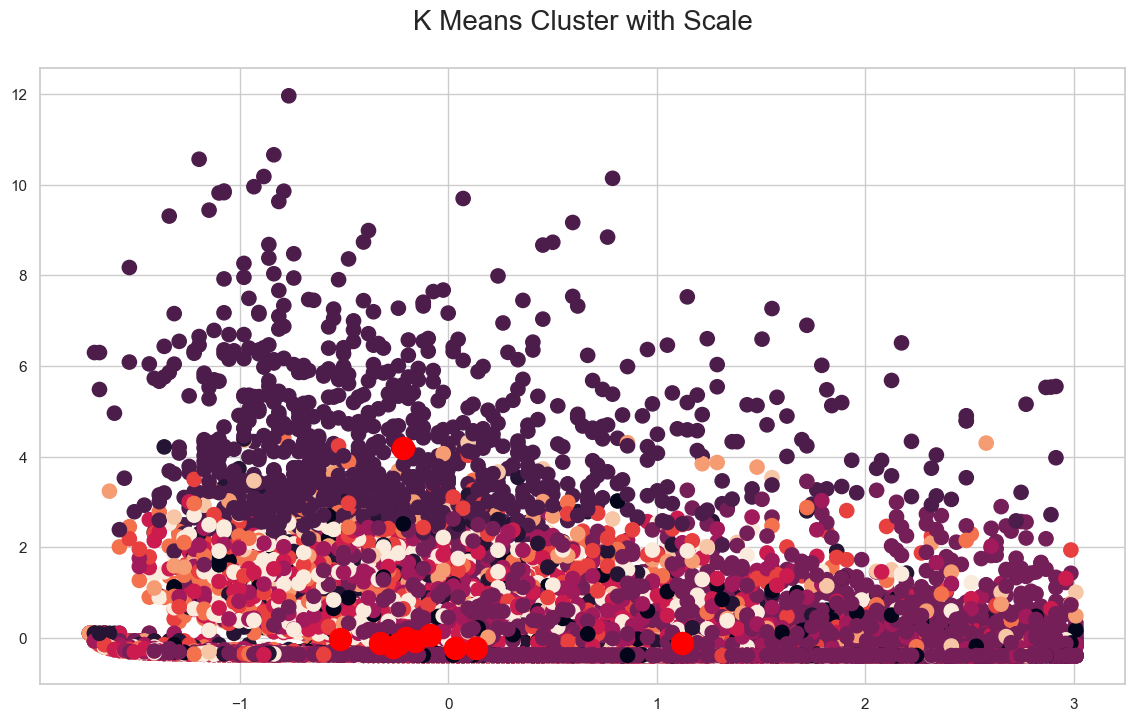

In [64]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Cluster with Scale\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

This 2D chart is uncomprehendible. There are so many features that it is impossible to decipher anything from this chart. Let's incorporate PCA and see if that helps to reduce noise and make this chart easier to understand.

In [65]:
# set PCA components and standardize data
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(X1_scaled)

# set up parameters for prediction
kmeans_scaled = KMeans(n_clusters=11, random_state=42)
clusters = kmeans_scaled.fit_predict(transformed_pca)

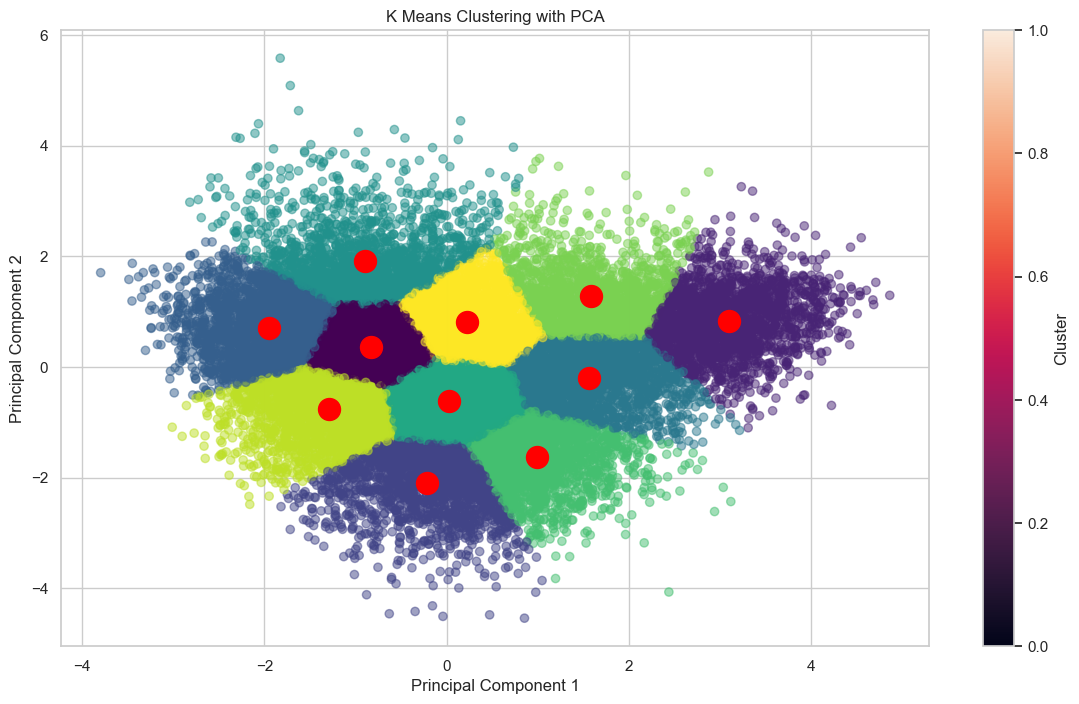

In [66]:
# plot PCA results

plt.figure(figsize=(14,8))
plt.scatter(transformed_pca[:,0], transformed_pca[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color='red', s=250)
plt.title('K Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

This is a much better visual. From this model, we can see that the K Means Clustering with PCA worked and the model can sort songs. Now, let's go ahead and see how the songs were sorted. 

In [67]:
# add "Cluster" column to cleaned data set and use the scaled data KMeans with scaled data that was visualized with PCA 
kmeans_scaled = KMeans(n_clusters=11, random_state=42)
cleaned_df['Cluster'] = kmeans_scaled.fit_predict(X1_scaled)

In [68]:
# load raw data set, inserting categorical columns into the cleaned_df dataset
df = pd.read_csv("/Users/sa18/Desktop/Unsupervised_DJ/Data/train.csv")

label = df[['genre', 'artist_name', 'track_name', 'release_date']]

label = pd.concat([label, cleaned_df], axis=1)

label

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,4
1,pop,frankie laine,i believe,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000,0
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,10
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,5
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,mack 10,10 million ways,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286,2
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,1
28359,hip hop,nine,whutcha want?,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,1
28360,hip hop,will smith,switch,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,1


In [69]:
# let's see the value count of each cluster
cleaned_df['Cluster'].value_counts().sort_index().to_frame(name='Count')

,Count
Cluster,
0,4172
1,3829
2,2132
3,1827
4,2408
5,1653
6,4996
7,1009
8,950


In [70]:
# let's take a peek into some of the clusters
label[cleaned_df['Cluster'] == 0].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
11484,country,carrie underwood,whenever you remember,2005,78,0.000702,0.054709,0.636491,0.000702,0.041846,...,0.000702,0.000702,0.000702,0.000702,0.099507,0.000702,0.000702,0.044321,0.214286,0
20723,jazz,jordan rakei,the light,2016,86,0.000907,0.000907,0.592698,0.000907,0.000907,...,0.056754,0.000907,0.000907,0.000907,0.241802,0.018814,0.038255,0.000907,0.057143,0
2864,pop,donna summer,unconditional love,1983,79,0.001053,0.001053,0.361841,0.001053,0.021566,...,0.001053,0.001053,0.001053,0.001053,0.031602,0.083673,0.219453,0.001053,0.528571,0
3033,pop,hüsker dü,beyond the threshold,1984,31,0.004785,0.004785,0.333849,0.004785,0.004785,...,0.004785,0.118449,0.471147,0.004785,0.004785,0.004785,0.004785,0.004785,0.514286,0
27086,rock,mumford & sons,ditmas,2015,28,0.002105,0.002105,0.448798,0.002105,0.002105,...,0.073556,0.002105,0.002105,0.065832,0.002105,0.002105,0.114442,0.002105,0.071429,0
1531,pop,gene clark,with tomorrow,1971,33,0.001754,0.001754,0.696713,0.001754,0.001754,...,0.094229,0.001754,0.001754,0.001754,0.001754,0.001754,0.001754,0.091286,0.700000,0
11609,country,keb' mo',life is beautiful,2006,90,0.021842,0.000675,0.351107,0.062893,0.000675,...,0.000675,0.038302,0.031948,0.000675,0.264747,0.000675,0.000675,0.000675,0.200000,0
26711,rock,stevie nicks,landslide,2011,65,0.001253,0.001253,0.448532,0.001253,0.001253,...,0.001253,0.001253,0.001253,0.114280,0.240872,0.078784,0.099989,0.001253,0.128571,0
18082,jazz,chick corea,you're everything,1973,21,0.002392,0.002392,0.216372,0.120218,0.002392,...,0.002392,0.002392,0.316065,0.002392,0.164905,0.002392,0.002392,0.067203,0.671429,0
11139,country,johnny cash,i see a darkness,2000,42,0.001462,0.103939,0.319059,0.001462,0.001462,...,0.184839,0.001462,0.001462,0.098402,0.132736,0.001462,0.059815,0.001462,0.285714,0


In [71]:
label[cleaned_df['Cluster'] == 1]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
10,pop,liva weel,"drømmer man om den, vågner..",1951,113,0.017090,0.026486,0.000774,0.000774,0.000774,...,0.079665,0.720557,0.080988,0.000774,0.065153,0.000774,0.000774,0.000774,0.985714,1
12,pop,frankie laine,necessary evil,1951,173,0.000627,0.244358,0.083570,0.000627,0.013375,...,0.109129,0.458984,0.000627,0.000627,0.000627,0.000627,0.000627,0.032581,0.985714,1
27,pop,asha bhosle,gullyachi shapath,1952,127,0.000693,0.040706,0.000693,0.028726,0.000693,...,0.000693,0.688167,0.000693,0.064938,0.122569,0.000693,0.000693,0.000693,0.971429,1
64,pop,ted heath,believe in me,1956,121,0.057984,0.000578,0.000578,0.000578,0.024864,...,0.141719,0.588776,0.000578,0.000578,0.141685,0.000578,0.000578,0.000578,0.914286,1
66,pop,lata mangeshkar,pahuni raghunandan savala,1956,46,0.002924,0.002924,0.002924,0.002924,0.002924,...,0.183700,0.667948,0.002924,0.002924,0.002924,0.002924,0.002924,0.101568,0.914286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28356,hip hop,the roots,the seed (2.0),2019,61,0.001224,0.001224,0.105172,0.001224,0.001224,...,0.001224,0.325359,0.001224,0.001224,0.165883,0.001224,0.001224,0.001224,0.014286,1
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,1
28359,hip hop,nine,whutcha want?,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,1
28360,hip hop,will smith,switch,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,1


In [72]:
label[cleaned_df['Cluster'] == 2]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
37,pop,t. m. soundararajan,ethanai periya,1953,74,0.001253,0.066192,0.335708,0.001253,0.027847,...,0.001253,0.001253,0.001253,0.382074,0.001253,0.055239,0.001253,0.001253,0.957143,2
49,pop,harry belafonte,mark twain,1954,64,0.002392,0.002392,0.002392,0.002392,0.002392,...,0.002392,0.002392,0.378403,0.370635,0.115315,0.002392,0.002392,0.002392,0.942857,2
50,pop,harry belafonte,the next big river,1954,112,0.001645,0.375904,0.172299,0.001645,0.001645,...,0.001645,0.001645,0.001645,0.238618,0.001645,0.001645,0.001645,0.001645,0.942857,2
60,pop,bill haley & his comets,two hound dogs,1955,156,0.000612,0.000612,0.000612,0.000612,0.012723,...,0.000612,0.000612,0.358619,0.173299,0.013151,0.000612,0.000612,0.000612,0.928571,2
65,pop,ted heath,take the “a” train,1956,199,0.000516,0.000516,0.000516,0.000516,0.000516,...,0.136611,0.304397,0.020922,0.483828,0.000516,0.000516,0.000516,0.000516,0.914286,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28318,hip hop,afroman,crazy rap (colt 45 & 2 zig zags),2019,140,0.027323,0.000572,0.000572,0.024718,0.000572,...,0.000572,0.364163,0.025880,0.287471,0.099398,0.000572,0.000572,0.000572,0.014286,2
28326,hip hop,big k.r.i.t.,king of the south,2019,68,0.001032,0.001032,0.052178,0.001032,0.001032,...,0.001032,0.354437,0.001032,0.420015,0.103657,0.001032,0.001032,0.001032,0.014286,2
28350,hip hop,nappy roots,blowin' trees,2019,74,0.001196,0.125810,0.353286,0.001196,0.001196,...,0.001196,0.040241,0.153930,0.207573,0.001196,0.001196,0.001196,0.001196,0.014286,2
28355,hip hop,nappy roots,country boyz,2019,109,0.000810,0.000810,0.000810,0.000810,0.000810,...,0.000810,0.394272,0.000810,0.515379,0.000810,0.000810,0.000810,0.000810,0.014286,2


In [73]:
label[cleaned_df['Cluster'] == 3]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
11,pop,the chordettes,carolina moon,1951,38,0.001645,0.001645,0.001645,0.397490,0.001645,...,0.066201,0.001645,0.093699,0.001645,0.417938,0.001645,0.001645,0.001645,0.985714,3
25,pop,lata mangeshkar,paas nahin aaiye haath na lagaiye,1952,18,0.002924,0.002924,0.002924,0.319657,0.002924,...,0.002924,0.002924,0.260384,0.002924,0.002924,0.002924,0.199746,0.002924,0.971429,3
39,pop,andy williams,it's the most wonderful time of the year,1953,79,0.001253,0.060214,0.001253,0.323077,0.001253,...,0.001253,0.089849,0.260828,0.001253,0.086128,0.038310,0.001253,0.022646,0.957143,3
61,pop,les paul,sleep,1955,51,0.001253,0.001253,0.001253,0.326881,0.001253,...,0.001253,0.001253,0.135853,0.001253,0.160594,0.001253,0.191683,0.001253,0.928571,3
67,pop,bill haley & his comets,come rock with me,1956,103,0.001224,0.001224,0.001224,0.400464,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.077885,0.116306,0.001224,0.046509,0.914286,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27831,hip hop,rayess bek,baghdad,2013,62,0.001074,0.154305,0.309147,0.369730,0.001074,...,0.150707,0.001074,0.001074,0.001074,0.001074,0.001074,0.001074,0.001074,0.100000,3
28039,hip hop,trina,100%,2017,75,0.001144,0.001144,0.001144,0.341296,0.044868,...,0.200939,0.186500,0.001144,0.001144,0.001144,0.001144,0.001144,0.029447,0.042857,3
28093,hip hop,vince staples,big fish,2017,59,0.001385,0.001385,0.001385,0.394986,0.001385,...,0.001385,0.171280,0.001385,0.277829,0.001385,0.001385,0.001385,0.001385,0.042857,3
28135,hip hop,kelly rowland,wonderful christmas time,2017,32,0.002770,0.002770,0.002770,0.608259,0.002770,...,0.002770,0.002770,0.064405,0.002770,0.069907,0.068149,0.002770,0.044116,0.042857,3
